## Loan Characteristics which affect the borrower’s APR or interest rate.
## by Rania Souri


## Investigation Overview


> In this investigation, I wanted to look at the characteristics of loans that affect the borrower’s APR. The main focus was on features: Sated Monthly Income, the loan Original Amount, the loan monthly payment,The CreditScoreRangeLower and CreditScoreRangeUpper.


## Dataset Overview

> The data contained 13937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others such as ListingCategory, Employment Status, LoanOriginalAmount, MonthlyLoanPayment, StatedMonthlyIncome, CreditScoreRangeLower, CreditScoreRangeUpper. 4717 data points were removed from the dataset due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('prosperLoanData.csv')

In [3]:
#selecting the features of our interest 
df1 = df[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','Occupation', 'ListingCategory (numeric)','EmploymentStatus','LoanOriginalAmount','StatedMonthlyIncome','MonthlyLoanPayment',
      'CreditScoreRangeLower','CreditScoreRangeUpper']]

In [4]:
# data wrangling, removing loans with inconsistent or missing data.
df1=df1.drop_duplicates() #removing duplicated data
df1=df1.dropna()        #removing missing values
#Keeping just the values of StatedMonthlyIncome column more than 30k$
df1 = df1[df1.StatedMonthlyIncome<=30000]

## Distribution of Borrower APR:




>The Borrower APR varied from 0.00653% to 0.42395%, its distribution seems to be multimodal,it appears also that the most attributed APR are around 0.2% and there is only few loans with an APR greater than 0.4%.

In [5]:
def myCountPlot (df,xVar):
    #set plot dimensions
    plt.figure(figsize=[14,8])
    #plot
    sb. countplot (data=df ,x=xVar, edgecolor='black');
    #add title and format it
    plt.title(f'''Distribution of {xVar}'''.title() ,fontsize=14, weight='bold')
    #Add x label and format it
    plt.xlabel(xVar.title(),fontsize=10 ,weight='bold')
    #plt.xticks(rotation=30) # add it if the labels are too much to appear
    #Add y label and format it
    plt.ylabel( 'Frequency' .title(),fontsize=10 ,weight='bold')

In [6]:
#A function to draw a histogram #
def hist_plot_by(df, xVar, bins):
    plt.figure(figsize=[14,8])
    plt.hist(data = df, x =xVar, bins = bins)
    plt.title(f'''Distribution of {xVar}'''.title() ,fontsize=14, weight='bold')
     #Add x label and format it
    plt.xlabel(xVar.title(),fontsize=10 ,weight='bold')
    #plt.xlim([0,0.5])
    #Add y label and format it
    plt.ylabel( 'Frequency' .title(),fontsize=10 ,weight='bold')

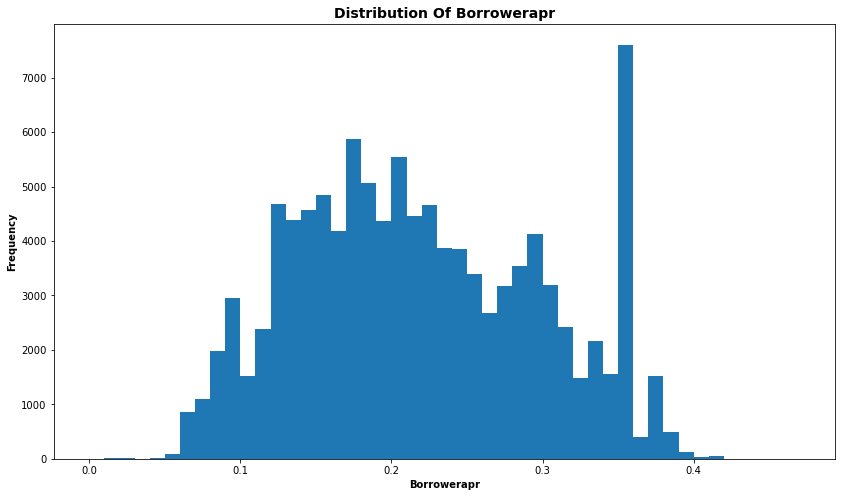

In [7]:
hist_plot_by(df1, 'BorrowerAPR', np.arange(0, df1.BorrowerAPR.max()+0.05, 0.01));

## Distribution of Original Amount of Loan

> The loans amount varied between 1000to 35000, its distribution is multimodal, and it appears that the most amount of loans attributed to borrowers is 15K ($)

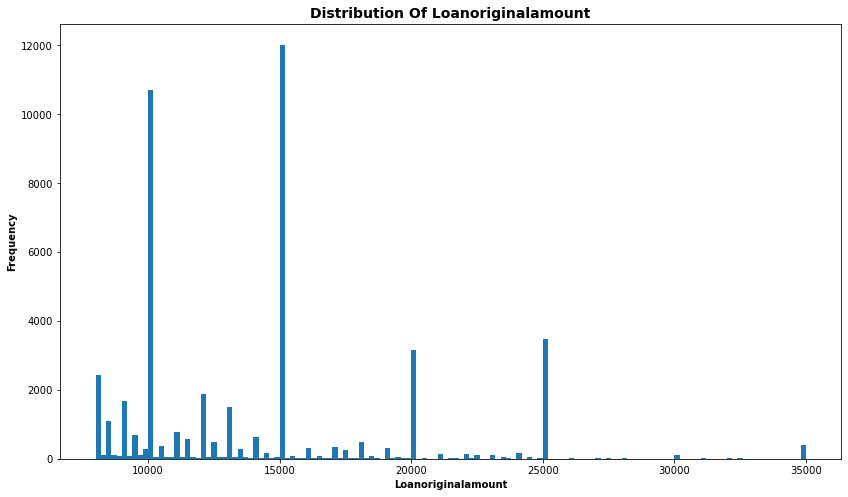

In [8]:
hist_plot_by(df1, 'LoanOriginalAmount', np.arange(8000, df1.LoanOriginalAmount.max()+200, 200));

## Correlation plot
The Stated Monthly Income is positively correlated with Loan Original Amount, by that,what can be said about one of the two variables applies to the other as well. <br>
The visualization plotted are based on the results of this plot which include the relationship founded between feature  

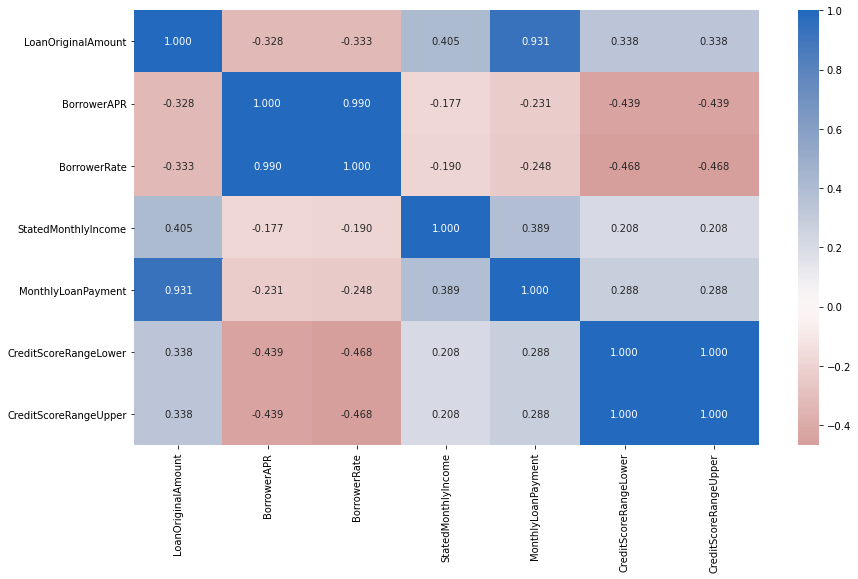

In [9]:
numeric_vars =['LoanOriginalAmount', 'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome','MonthlyLoanPayment','CreditScoreRangeLower', 'CreditScoreRangeUpper']
categoric_vars = ['Term', 'ListingCategory (numeric)', 'EmploymentStatus']
# correlation plot
plt.figure(figsize = [14, 8])
sb.heatmap(df1[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

## The relation between Borrower APR and Loan Amount
>- When the incomes increases, the loan Original Amount increase and so that the loan monthly payment increase, and by that the BorrowerAPR decrease.


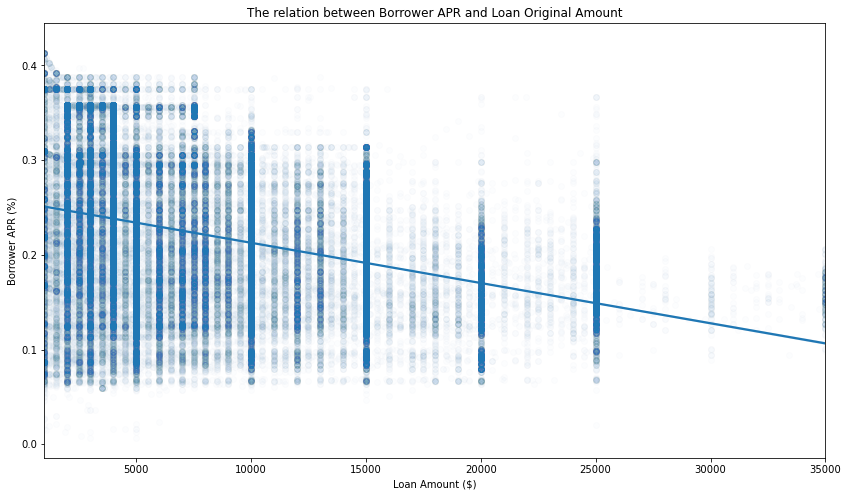

In [10]:
plt.figure(figsize = [14, 8])
sb.regplot(data = df1, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01})
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR (%)')
plt.title('The relation between Borrower APR and Loan Original Amount');

## The relation between Borrower APR and Upper/Lower Credit Score Range:
>-THe Borrower APR and The Credit Score Range (Upper/lower) are negatively correlated, thus, the better your score, the lower your APR and Rate.

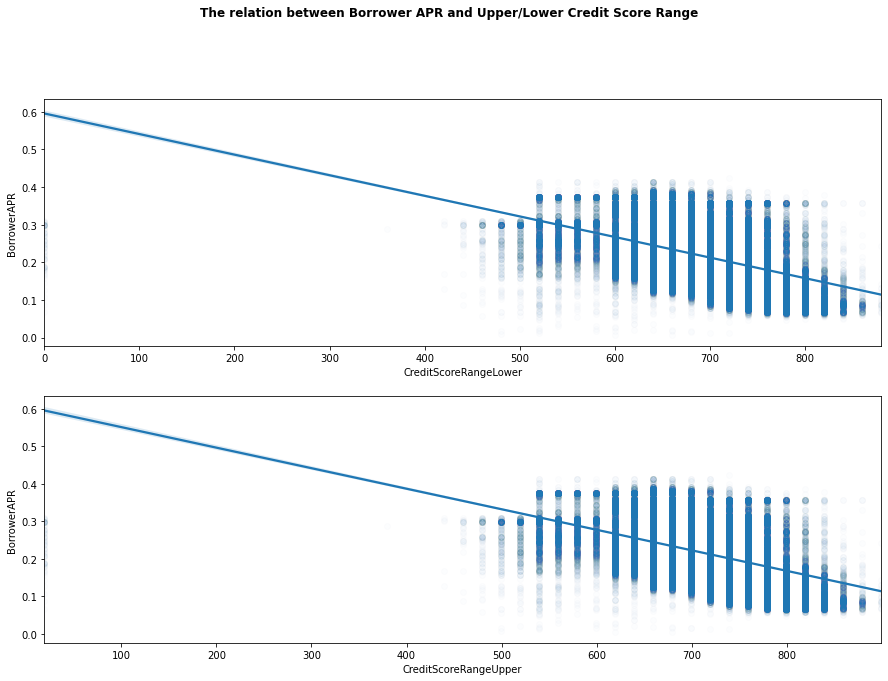

In [11]:
# let's plot the Lower and Upper Credit Score Range.

fig, ax = plt.subplots(nrows=2, figsize = [15,10])
sb.regplot(data = df1, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, ax = ax[0])
sb.regplot(data = df1, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', scatter_kws={'alpha':0.01}, ax = ax[1])
plt.figtext(0.5,1, 'The relation between Borrower APR and Upper/Lower Credit Score Range',fontsize=12, ha='center', va='center',weight='bold')
plt.show();

## The relation between Borrower APR, Borrower Rate and the Term
When the term of the loan is large the Borrower Rate increase,and that is not the case for the Borrower APR which decrease for the term 36 and that's can be explained because most of the loan for this term has been completed, and obviously a good rating is attributed.

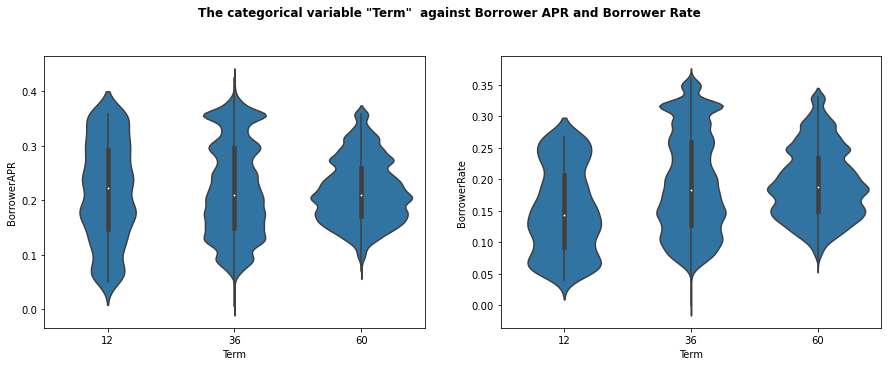

In [12]:
# plot the categorical variable Term  against Borrower APR and Borrower Rate, this time
# with full data and variable transforms
default_color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])
sb.violinplot(data = df1, x = 'Term', y = 'BorrowerAPR', ax = ax[0],
               color = default_color)
sb.violinplot(data = df1, x = 'Term', y = 'BorrowerRate', ax = ax[1],color = default_color)
#plt.title('The categorical variable "Term"  against Borrower APR and Borrower Rate', ha='center',va='center')
plt.figtext(0.5,1, 'The categorical variable "Term"  against Borrower APR and Borrower Rate',fontsize=12, ha='center', va='center',weight='bold')
plt.show();

## Listing Category effect on relationship of APR and Loan Amount
>-The Borrower APR variation interval differs from one category to another. Therefore, the type of loan affect also the Borrower APR. Note that, for every catagory, when the loan amount increase the Borrower APR decrease.

In [13]:
samples = np.random.choice(df1.shape[0], 2000, replace = False)

df1_samp = df1.sample(n=5000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)
#plt.figure(figsize = [10,10])

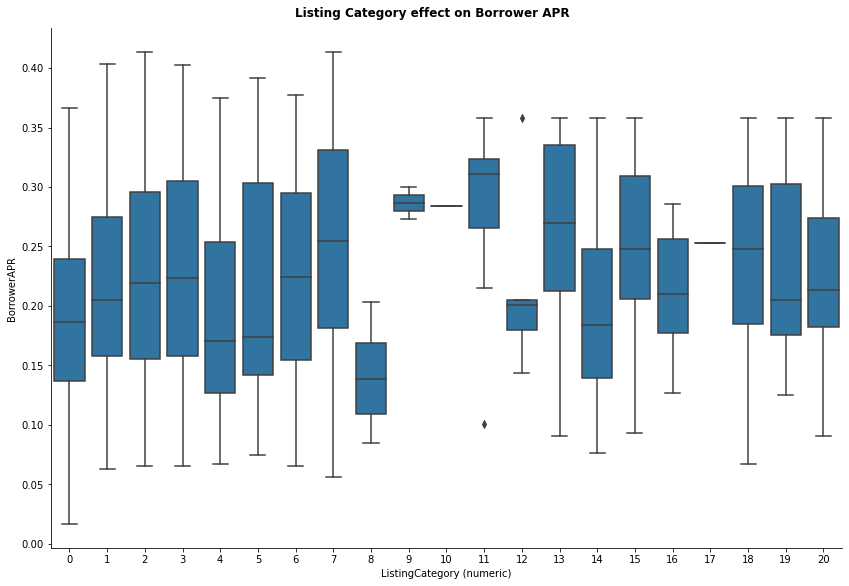

In [14]:
g = sb.PairGrid(data = df1_samp, y_vars = ['BorrowerAPR'], x_vars = 'ListingCategory (numeric)',
                size = 8, aspect = 1.5)
g.map(boxgrid)
plt.figtext(0.5,1, 'Listing Category effect on Borrower APR',fontsize=12, ha='center', va='center',weight='bold')
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt